# StockForecast
### Our project builds a machine-learning model that predicts future stock prices using historical market data. It identifies trends and patterns in time-series data to provide accurate and reliable price forecasts.

## Importing The essential **Library**

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

## Selecting The **Stock**

In [2]:
sp500 = yf.Ticker("^GSPC")

In [3]:
sp500 = sp500.history(period = "max")

### Write:

### The dataset contains historical S&P 500 price data including:

Open, High, Low, Close

Volume

Tomorrow (next day close)

Target (1 = price goes up next day, 0 = down)

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-11-10 00:00:00-05:00,6785.359863,6841.319824,6770.560059,6832.430176,5366050000,0.0,0.0
2025-11-11 00:00:00-05:00,6815.640137,6855.129883,6806.870117,6846.609863,4983490000,0.0,0.0
2025-11-12 00:00:00-05:00,6867.770020,6869.910156,6829.620117,6850.919922,5293610000,0.0,0.0


In [5]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-11-03 00:00:00-05:00', '2025-11-04 00:00:00-05:00',
               '2025-11-05 00:00:00-05:00', '2025-11-06 00:00:00-05:00',
               '2025-11-07 00:00:00-05:00', '2025-11-10 00:00:00-05:00',
               '2025-11-11 00:00:00-05:00', '2025-11-12 00:00:00-05:00',
               '2025-11-13 00:00:00-05:00', '2025-11-14 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24586, freq=None)

### **Visualizing** the opening market price.

In [ ]:
sp500.plot.line(y = "Open", use_index = True)

plt.xticks(
    sp500.index[::10*252],
    rotation = 45
)

plt.show()

## Deleting The **Columns** That Are Not Useful

In [7]:
# del sp500["Stock Splits"]
# del sp500["Dividends"]
# del sp500["Target"]
# del sp500["Tomorrow"]

# Creating a new column named Tomorrow to store the next day’s closing price.

In [8]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [9]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow
Date,,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.500000
...,...,...,...,...,...,...,...,...
2025-11-10 00:00:00-05:00,6785.359863,6841.319824,6770.560059,6832.430176,5366050000,0.0,0.0,6846.609863
2025-11-11 00:00:00-05:00,6815.640137,6855.129883,6806.870117,6846.609863,4983490000,0.0,0.0,6850.919922
2025-11-12 00:00:00-05:00,6867.770020,6869.910156,6829.620117,6850.919922,5293610000,0.0,0.0,6737.490234


## We are Checking The Tomorrow Price is Greater Than Today's Closing Price

In [ ]:
sp500["Target"] = (sp500["Tomorrow"] >  sp500["Close"]).astype(int)

## Numerical **Value** Representation  
### 1 = **True**
### 0 = **False**

In [11]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target
Date,,,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.500000,0
...,...,...,...,...,...,...,...,...,...
2025-11-10 00:00:00-05:00,6785.359863,6841.319824,6770.560059,6832.430176,5366050000,0.0,0.0,6846.609863,1
2025-11-11 00:00:00-05:00,6815.640137,6855.129883,6806.870117,6846.609863,4983490000,0.0,0.0,6850.919922,1
2025-11-12 00:00:00-05:00,6867.770020,6869.910156,6829.620117,6850.919922,5293610000,0.0,0.0,6737.490234,0


## **Selecting** data after 1990-01-01 to avoid older historical data influencing the prediction.

In [12]:
sp500 = sp500.loc["1990-01-01":].copy()

In [13]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target
Date,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,0.0,0.0,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,0.0,0.0,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,0.0,0.0,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,0.0,0.0,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,0.0,0.0,349.619995,0
...,...,...,...,...,...,...,...,...,...
2025-11-10 00:00:00-05:00,6785.359863,6841.319824,6770.560059,6832.430176,5366050000,0.0,0.0,6846.609863,1
2025-11-11 00:00:00-05:00,6815.640137,6855.129883,6806.870117,6846.609863,4983490000,0.0,0.0,6850.919922,1
2025-11-12 00:00:00-05:00,6867.770020,6869.910156,6829.620117,6850.919922,5293610000,0.0,0.0,6737.490234,0


## Importing the **Machine Learning Model**

In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, min_samples_split= 50 , random_state=1)

train =  sp500.iloc[:-100]
test =  sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "Low"]
model.fit(train[predictors],train['Target'])

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,50
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## **Predicting** The Value's

In [15]:
from sklearn.metrics  import precision_score

preds = model.predict(test[predictors])

In [16]:
import pandas as pd

preds = pd.Series(preds, index= test.index)

In [17]:
precision_score(test["Target"], preds)

c:\Users\shriyansh\Projects\numpy_PY\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


0.0

In [18]:
combined = pd.concat([test["Target"], preds], axis = 1)

## Plotting the  **Actual Value** VS **Predicted Value**

<Axes: xlabel='Date'>

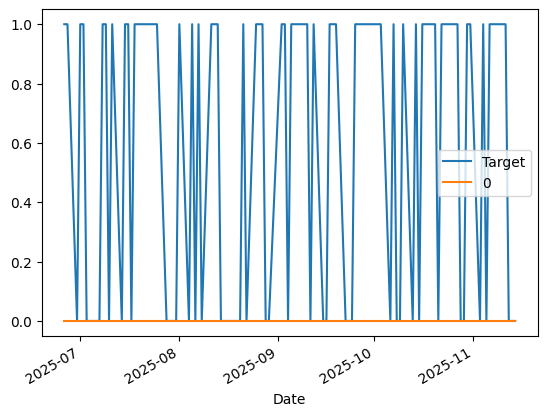

In [19]:
combined.plot()

## **Creating a Function** To Increase The Model Effficently


In [20]:
def predict(train,test,predictors,model):
    model.fit(train[predictors],train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name ="Predictions")
    combined =  pd.concat([test["Target"],preds], axis = 1)
    return combined

## Creating A Backset Function To Increase **Accuracy** Of The Model

In [39]:
def backset(data, model, predictors, start=2500, step=250):
    all_Predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()

        predictions = predict(train, test, predictors, model)
        all_Predictions.append(predictions)

    return pd.concat(all_Predictions)

## **Predictioning** How Many Times Did The Market Go **UP** Or **DOWN**

In [40]:
predictions = backset(sp500, model, predictors)

In [41]:
predictions["Predictions"].value_counts()

Predictions
0.0    5432
1.0    1104
Name: count, dtype: int64

### Use **Precision Score** To See How Many Times We Were  Right

In [42]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5163043478260869

### ***0.5429389312977099***  This Is The Precision Score Of The Model

In [43]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.537332
0    0.462668
Name: count, dtype: float64

In [44]:
horizons = [2, 5, 60, 250, 1000]
new_Predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_Predictors += [ratio_column, trend_column]

## **Improving** Our Model

In [45]:
sp500.head(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,0.0,0.0,358.76001,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [47]:
def predict(train, test, predictors, model):
    model.fit(train[predictors],train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index = test.index, name = "Predictions" )
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [48]:
predictions["Predictions"].value_counts()

Predictions
0.0    5432
1.0    1104
Name: count, dtype: int64

## Calcualting The **Precision Score** After Improving Model

In [49]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5163043478260869